#LEAD SCORING CASE STUDY
   
   
   **Problem Statement
   
       An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

       The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

      There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

    X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

**Goals of the Case Study

      Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
# Importing libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Downloading the dataset for the analysis
data = pd.read_csv("C:\\Users\\joshn\\OneDrive\\Desktop\\Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
data.shape

(9240, 37)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# includes numerical and categorical
data.describe(include = 'all')


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [7]:
data.Converted.value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [8]:
data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# calculating the null values in percentile format
round(100*(data.isnull().sum()/len(data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
data.select_dtypes(include=['int']).dtypes

Lead Number                    int64
Converted                      int64
Total Time Spent on Website    int64
dtype: object

In [12]:
data.select_dtypes(include=['object']).dtypes

Prospect ID                                      object
Lead Origin                                      object
Lead Source                                      object
Do Not Email                                     object
Do Not Call                                      object
Last Activity                                    object
Country                                          object
Specialization                                   object
How did you hear about X Education               object
What is your current occupation                  object
What matters most to you in choosing a course    object
Search                                           object
Magazine                                         object
Newspaper Article                                object
X Education Forums                               object
Newspaper                                        object
Digital Advertisement                            object
Through Recommendations                         

## drop the columns havving missing valuse more than 40 %

In [13]:
cols=data.columns

for i in cols:
    if((100*(data[i].isnull().sum()/len(data.index))) >= 40):
        data.drop(i, 1, inplace = True)

In [14]:
round(100*(data.isnull().sum()/len(data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [15]:
data.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

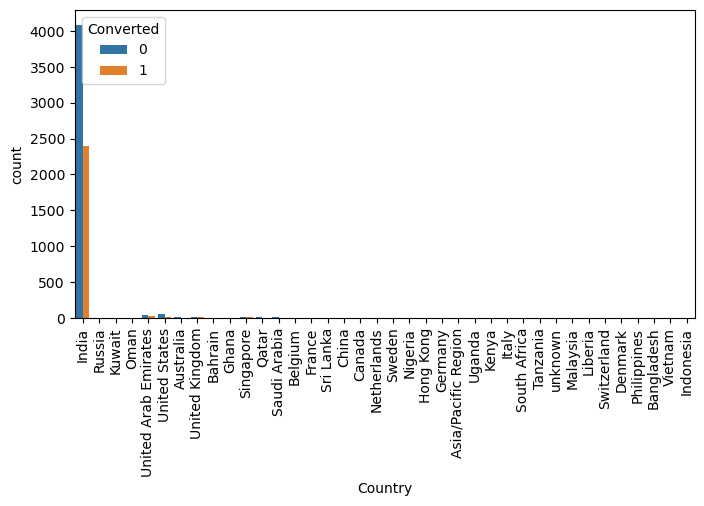

In [16]:
plt.figure(figsize=(8,4))
s1=sns.countplot(data.Country, hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

## The distribution of the data is very heavily skewed, with India + null values = 97% of the total. It is safe to drop this column.

In [17]:
data.drop('Country', axis = 1, inplace = True)

In [18]:
data.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [19]:
data['Specialization'] = data['Specialization'].replace(np.nan, 'Not Specified')

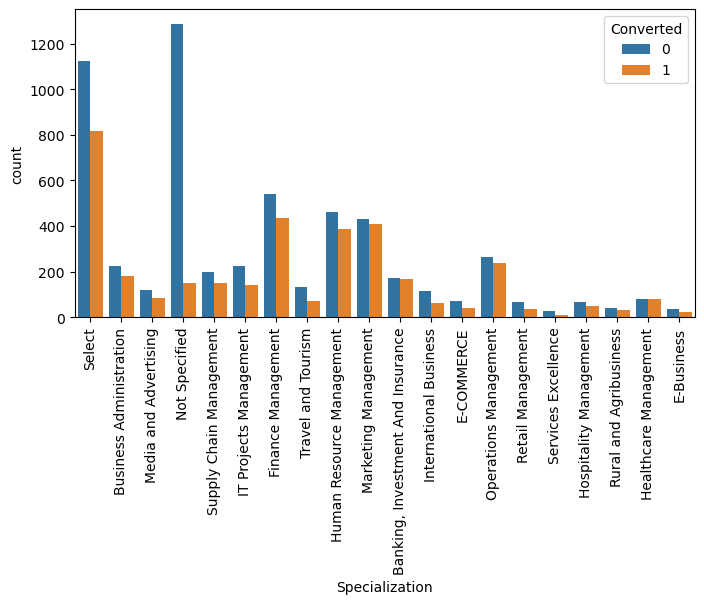

In [20]:
plt.figure(figsize=(8,4))
s1=sns.countplot(data.Specialization, hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [21]:
data.Converted.value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [22]:
data['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [23]:
data.drop(['How did you hear about X Education'],axis = 1, inplace = True)

In [24]:
round(100*(data.isnull().sum()/len(data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

####dropping Lead Number and Prospect ID since they have all unique values

In [25]:
data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [26]:
data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [27]:
data['What is your current occupation'].isnull().sum()

2690

In [28]:
data = data[~pd.isnull(data['What is your current occupation'])]

In [29]:
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [30]:
data.drop(['What matters most to you in choosing a course'], axis = 1, inplace =  True)

In [31]:
data.Tags

0               Interested in other courses
1                                   Ringing
2       Will revert after reading the email
3                                   Ringing
4       Will revert after reading the email
                       ...                 
9234    Will revert after reading the email
9235    Will revert after reading the email
9236                     wrong number given
9237                         invalid number
9239    Will revert after reading the email
Name: Tags, Length: 6550, dtype: object

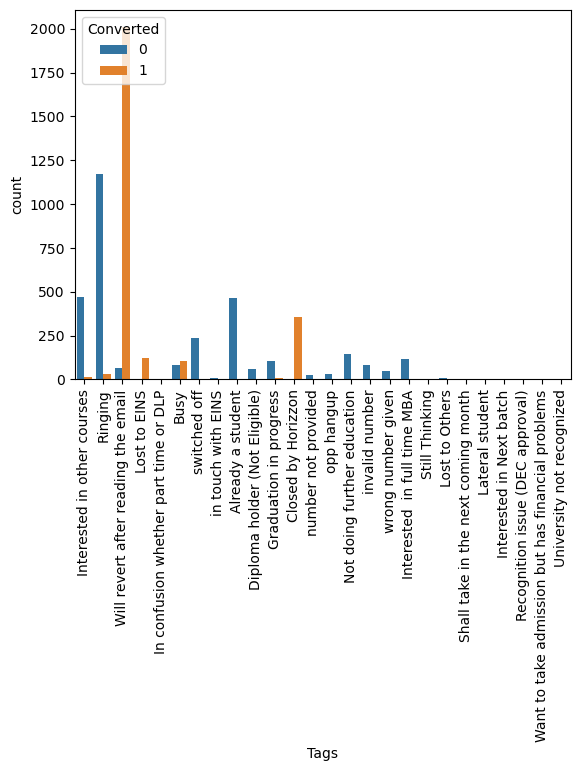

In [32]:
s1=sns.countplot(data['Tags'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [33]:
data.Converted.value_counts()

0    3359
1    3191
Name: Converted, dtype: int64

In [34]:
# dropping the tags as dont have major converted ones
data.drop(['Tags'],axis=1,inplace = True)

In [35]:
data['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

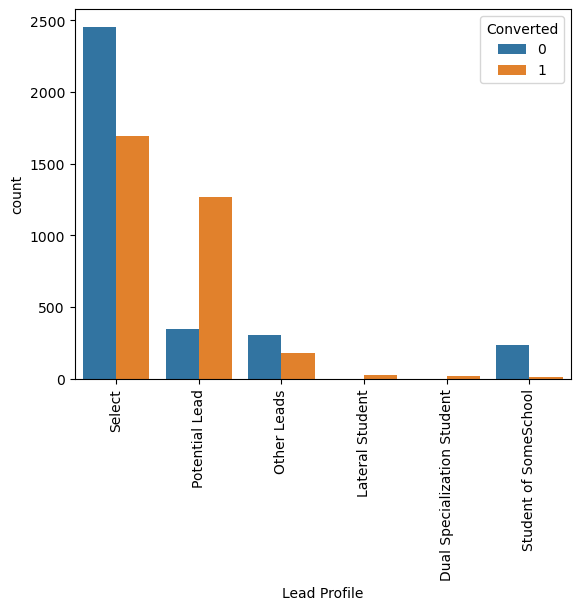

In [36]:
s1=sns.countplot(data['Lead Profile'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [37]:
data.drop(['Lead Profile'],axis = 1, inplace = True)

In [38]:
round(100*(data.isnull().sum()/len(data.index)),2)

Lead Origin                                 0.00
Lead Source                                 0.55
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.98
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.98
Last Activity                               1.57
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [39]:
data['Lead Source'].value_counts()

Google               2048
Direct Traffic       1891
Olark Chat            893
Organic Search        870
Reference             534
Welingak Website      142
Referral Sites         75
Facebook               46
Click2call              4
bing                    3
Social Media            2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
testone                 1
Press_Release           1
Name: Lead Source, dtype: int64

In [40]:
data['Lead Source'] = data['Lead Source'].apply(lambda x: x if 
                                            ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') | 
                                             (x=='Organic Search') | (x=='Reference')) 
                                            else 'Other Social Sites')

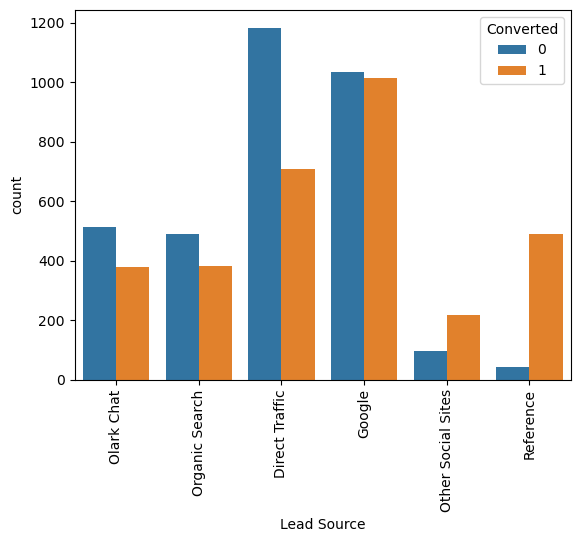

In [41]:
s1=sns.countplot(data['Lead Source'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Maximum number of leads are generated by Google and Direct traffic.
Conversion Rate of reference leads and leads through welingak website is high.
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [42]:
data['Last Activity'].value_counts()

Email Opened                    2460
SMS Sent                        2213
Page Visited on Website          429
Olark Chat Conversation          428
Converted to Lead                296
Email Bounced                    197
Email Link Clicked               178
Form Submitted on Website         82
Unreachable                       74
Unsubscribed                      43
Had a Phone Conversation          28
Approached upfront                 9
View in browser link Clicked       5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [43]:
data['Last Activity'] = data['Last Activity'].replace(np.nan,'Others')
data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')


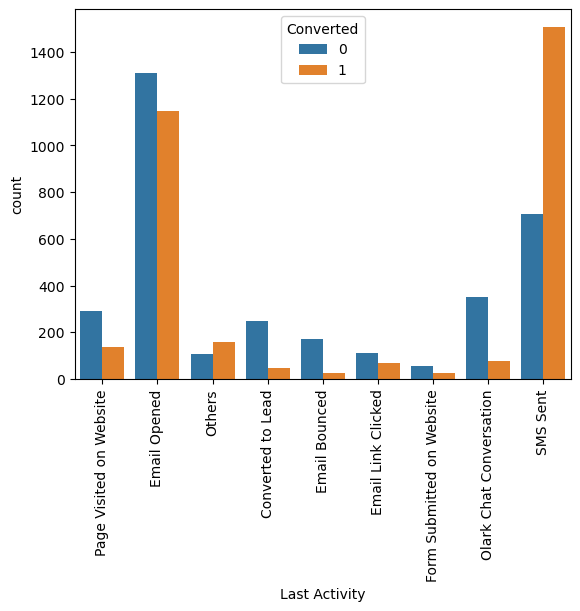

In [44]:
s1=sns.countplot(data['Last Activity'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### From the last activity  we can analyse that mostly converted people are through email and sms .

In [45]:
data.Converted.value_counts()

0    3359
1    3191
Name: Converted, dtype: int64

In [46]:
data.TotalVisits.isnull().sum()

130

In [47]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [48]:
df_new = data[['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 
           'Newspaper','Update me on Supply Chain Content', 'Get updates on DM Content', 'Digital Advertisement', 'I agree to pay the amount through cheque','Through Recommendations', 'A free copy of Mastering The Interview',]]

# see value counts for each of the columns
for i in df_new.columns:
    x = (df_new[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No     92.916031
Yes     7.083969
Name: Do Not Email, dtype: float64

No     99.969466
Yes     0.030534
Name: Do Not Call, dtype: float64

No     99.847328
Yes     0.152672
Name: Search, dtype: float64

No     99.984733
Yes     0.015267
Name: Newspaper Article, dtype: float64

No    100.0
Name: X Education Forums, dtype: float64

No     99.984733
Yes     0.015267
Name: Newspaper, dtype: float64

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

No    100.0
Name: Get updates on DM Content, dtype: float64

No     99.954198
Yes     0.045802
Name: Digital Advertisement, dtype: float64

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

No     99.908397
Yes     0.091603
Name: Through Recommendations, dtype: float64

No     66.854962
Yes    33.145038
Name: A free copy of Mastering The Interview, dtype: float64



In [49]:
data.Converted.value_counts()

0    3359
1    3191
Name: Converted, dtype: int64

In [50]:
df_pred = data[[ 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 
           'Newspaper','Update me on Supply Chain Content', 'Get updates on DM Content', 'Digital Advertisement', 'I agree to pay the amount through cheque','Through Recommendations',]]


In [51]:
data.drop(df_pred, axis = 1, inplace = True)

In [52]:
round(100*(data.isnull().sum()/len(data.index)),2)

Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.98
Total Time Spent on Website               0.00
Page Views Per Visit                      1.98
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
Magazine                                  0.00
Receive More Updates About Our Courses    0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [53]:
data.Magazine.value_counts()

No    6550
Name: Magazine, dtype: int64

In [54]:
data.drop(['Magazine'],axis = 1,inplace = True)

In [55]:
data['Receive More Updates About Our Courses'].value_counts()

No    6550
Name: Receive More Updates About Our Courses, dtype: int64

In [56]:
data.drop(['Receive More Updates About Our Courses'],axis = 1,inplace = True)

In [57]:
round(100*(data.isnull().sum()/len(data.index)),2)

Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.98
Total Time Spent on Website               0.00
Page Views Per Visit                      1.98
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

## OUTLIERS


In [58]:
data_outliers = data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
data_outliers.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6420.000000,6550.000000,6420.000000
mean,3.604050,540.627481,2.466978
std,5.037196,567.897857,2.166570
min,0.000000,0.000000,0.000000
25%,1.000000,35.000000,1.000000
50%,3.000000,293.000000,2.000000
75%,5.000000,1030.000000,3.500000
max,251.000000,2272.000000,55.000000


###  from the above data we can identify outliers are present 

In [59]:
data_outliers.describe(percentiles = (0.1,0.3,0.5,0.8,0.9,0.95,0.99))

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6420.000000,6550.000000,6420.000000
mean,3.604050,540.627481,2.466978
std,5.037196,567.897857,2.166570
min,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000
30%,2.000000,80.000000,1.500000
50%,3.000000,293.000000,2.000000
80%,5.000000,1158.000000,4.000000
90%,7.100000,1438.100000,5.000000
95%,10.000000,1600.550000,6.000000


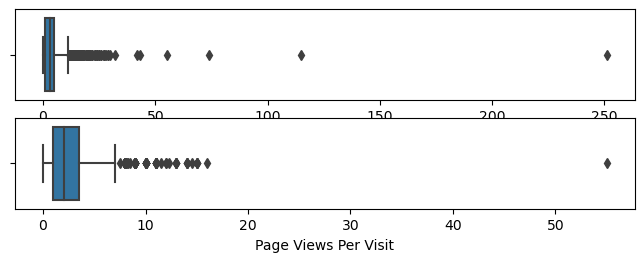

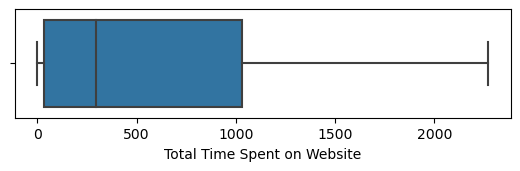

In [60]:
plt.figure(figsize = (8,4))

plt.subplot(3,1,1)
sns.boxplot(data.TotalVisits)

plt.subplot(3,1,2)
sns.boxplot(data['Page Views Per Visit'])
plt.show()

plt.subplot(3,1,3)
sns.boxplot(data['Total Time Spent on Website'])
plt.show()

### Outliers are not present in 'Total Time Spent On Website' so capping is not required
-* outliers treatment has to be done for "total Visits' and 'Page Views Per Visit'now we perform capping

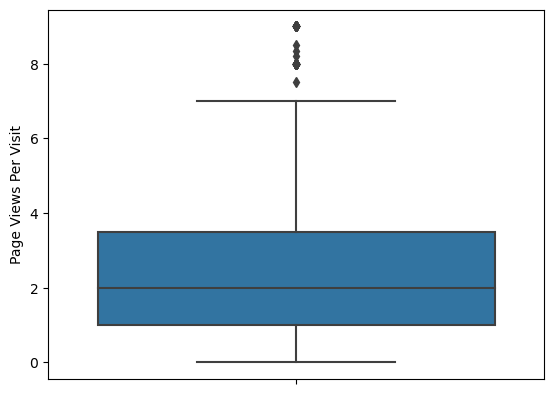

In [61]:
Q3 = data['Page Views Per Visit'].quantile(0.99)
data = data[data['Page Views Per Visit'] <= Q3]
Q1 = data['Page Views Per Visit'].quantile(0.01)
data = data[data['Page Views Per Visit'] >= Q1]
sns.boxplot(y=data['Page Views Per Visit'])
plt.show()


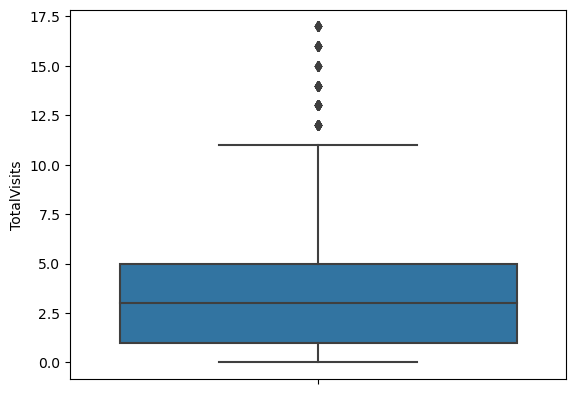

In [62]:
Q3 = data['TotalVisits'].quantile(0.99)
data = data[data['TotalVisits'] <= Q3]
Q1 = data['TotalVisits'].quantile(0.01)
data = data[data['TotalVisits'] >= Q1]
sns.boxplot(y=data['TotalVisits'])
plt.show()


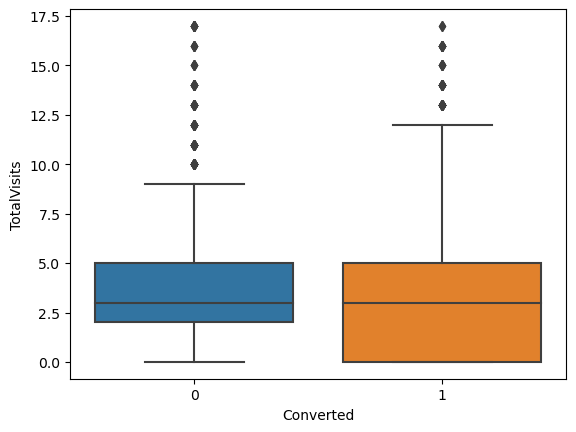

In [63]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)
plt.show()

## Inference 
        - Median for converted n non converted are same so we cannot conclude 

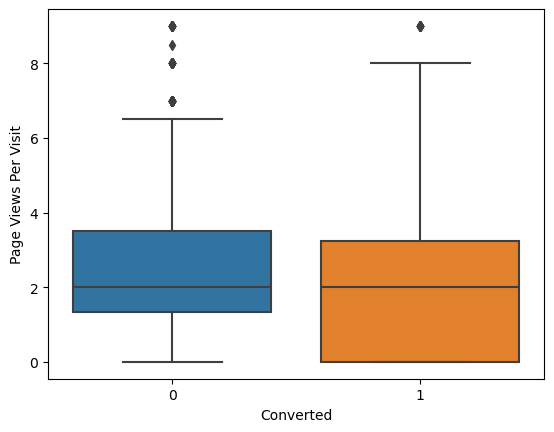

In [64]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data)
plt.show()

##  Median for converted and non converted is same nothing can be concluded 

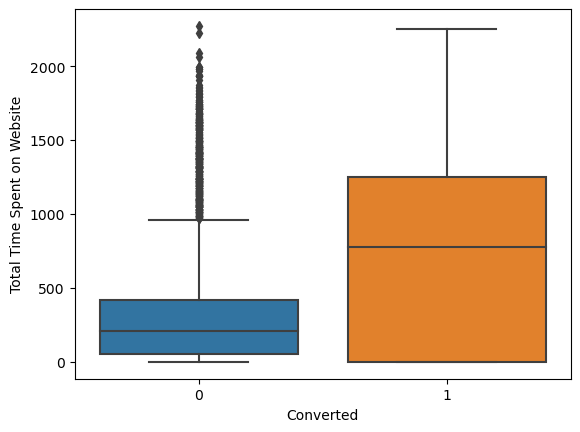

In [65]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)
plt.show()

# Inference
     - spending more time in websites are likely to get converted for the course
     - By increasing the content in the website may leads to get converted soon

## Checking again for missing values

In [66]:
round(100*(data.isnull().sum()/len(data.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

### Heat Map

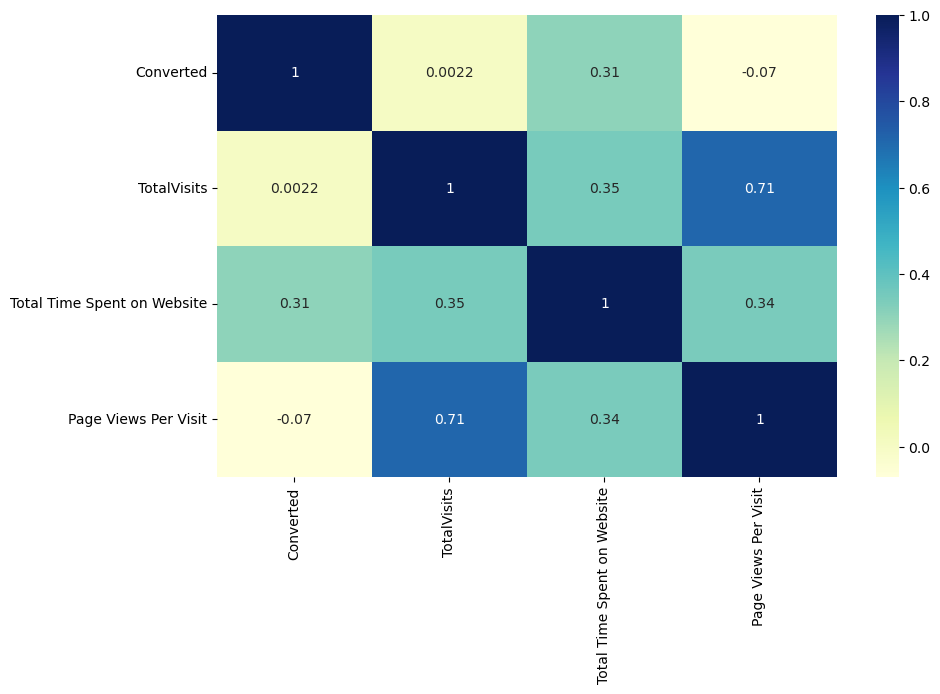

In [67]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 
plt.show()

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6310 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6310 non-null   object 
 1   Lead Source                             6310 non-null   object 
 2   Do Not Email                            6310 non-null   object 
 3   Converted                               6310 non-null   int64  
 4   TotalVisits                             6310 non-null   float64
 5   Total Time Spent on Website             6310 non-null   int64  
 6   Page Views Per Visit                    6310 non-null   float64
 7   Last Activity                           6310 non-null   object 
 8   Specialization                          6310 non-null   object 
 9   What is your current occupation         6310 non-null   object 
 10  City                                    6310 non-null   obje

In [69]:

categorical_cols= data.select_dtypes(include=['object']).columns
categorical_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [70]:
data[categorical_cols].describe()

,Lead Origin,Lead Source,Do Not Email,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
count,6310,6310,6310,6310,6310,6310,6310,6310,6310
unique,4,6,2,9,20,6,7,2,14
top,Landing Page Submission,Google,No,Email Opened,Select,Unemployed,Mumbai,No,Email Opened
freq,3559,2025,5873,2424,1849,5410,2397,4207,2011


- By the above data we can say that 'Do Not Email' and 'A free copy of Mastering The Interview have only two variables so we can replace them by 0 and 1 

In [71]:
binary_list = ['Do Not Email','A free copy of Mastering The Interview']
 
    
def binary_conv(x):
    return x.map({'Yes': 1,'No':0})

data[binary_list] = data[binary_list].apply(binary_conv)

In [72]:
data[categorical_cols].describe()

,Do Not Email,A free copy of Mastering The Interview
count,6310.000000,6310.000000
mean,0.069255,0.333281
std,0.253908,0.471423
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


- Now we add dummies for the remaining attributes

In [73]:
categorical_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [74]:
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 'What is your current occupation', 'City','Last Notable Activity']], drop_first = True)

# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)

In [75]:
data.drop(['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 'What is your current occupation', 'City','Last Notable Activity'],axis = 1,inplace = True)

In [76]:
data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [77]:
data['Converted'].value_counts(normalize = True)*100

0    51.917591
1    48.082409
Name: Converted, dtype: float64

##  from the above analysis we can predict that almost 48% got converted to paying customers

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6310 entries, 0 to 9239
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6310 non-null   int64  
 1   Converted                                             6310 non-null   int64  
 2   TotalVisits                                           6310 non-null   float64
 3   Total Time Spent on Website                           6310 non-null   int64  
 4   Page Views Per Visit                                  6310 non-null   float64
 5   A free copy of Mastering The Interview                6310 non-null   int64  
 6   Lead Origin_Landing Page Submission                   6310 non-null   uint8  
 7   Lead Origin_Lead Add Form                             6310 non-null   uint8  
 8   Lead Origin_Lead Import                               6310

## Train-Test Split and Logistic Regression Model Building 

In [79]:
from sklearn.model_selection import train_test_split


In [80]:
y = data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [81]:
# Independent Variables

X = data.drop(['Converted'],axis = 1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [82]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4417 entries, 8582 to 8299
Data columns (total 64 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          4417 non-null   int64  
 1   TotalVisits                                           4417 non-null   float64
 2   Total Time Spent on Website                           4417 non-null   int64  
 3   Page Views Per Visit                                  4417 non-null   float64
 4   A free copy of Mastering The Interview                4417 non-null   int64  
 5   Lead Origin_Landing Page Submission                   4417 non-null   uint8  
 6   Lead Origin_Lead Add Form                             4417 non-null   uint8  
 7   Lead Origin_Lead Import                               4417 non-null   uint8  
 8   Lead Source_Google                                    4

In [84]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
472,0,5.0,1250,5.00,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9132,0,17.0,119,2.83,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7689,0,2.0,181,2.00,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4239,0,10.0,1619,3.33,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7592,0,3.0,1576,3.00,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [85]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 4417 entries, 8582 to 8299
Series name: Converted
Non-Null Count  Dtype
--------------  -----
4417 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


In [86]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 1893 entries, 472 to 5675
Series name: Converted
Non-Null Count  Dtype
--------------  -----
1893 non-null   int64
dtypes: int64(1)
memory usage: 29.6 KB


# Scaling of data using Standard Scalar from Scikit learn

In [87]:
###   Importing Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#     Selecting numerical cols for scaling 

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8582,-0.279474,0.931209,0.069485,1.892332,-0.716011,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4387,-0.279474,-1.118534,-0.938455,-1.241445,-0.716011,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7577,-0.279474,-1.118534,-0.938455,-1.241445,-0.716011,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8879,-0.279474,-0.435286,0.351352,-0.196853,-0.716011,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9004,-0.279474,-1.118534,-0.938455,-1.241445,-0.716011,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


## Building Logistic Regression using RFE and stats model

In [88]:
# importing stats model 
import statsmodels.api as sm

In [89]:
from sklearn.linear_model import LogisticRegression

# Creating an instance of Logistic Regression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
 # running RFE with 15 variables 
rfe = RFE(logreg, n_features_to_select= 15)    
rfe = rfe.fit(X_train, y_train)

In [90]:
#printing the Output 
rfe.support_

array([False, False,  True, False, False,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True,  True, False, False, False,  True,  True,
       False])

In [91]:
# Combining the data to understand the full RFE data

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 15),
 ('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('A free copy of Mastering The Interview', False, 28),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 26),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 27),
 ('Lead Source_Other Social Sites', False, 13),
 ('Lead Source_Reference', False, 4),
 ('Last Activity_Email Bounced', False, 37),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', False, 5),
 ('Last Activity_Form Submitted on Website', False, 10),
 ('Last Activity_Olark Chat Conversation', False, 18),
 ('Last Activity_Others', False, 2),
 ('Last Activity_Page Visited on Website', False, 25),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 43),
 ('Specialization_E-Business', F

In [92]:
# checking the rfe Supported columns

rfe_support_col = X_train.columns[rfe.support_]
rfe_support_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_SMS Sent', 'Specialization_Not Specified',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'City_Select',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [93]:
# listing the columns which are not supported by RFE

X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Other Social Sites', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_M

## Analysing the data using models 

In [94]:
## Model 1

X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_model1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4417
Model:                            GLM   Df Residuals:                     4401
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1979.3
Date:                Thu, 13 Jul 2023   Deviance:                       3958.7
Time:                        18:55:59   Pearson chi2:                 4.65e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3868
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6924      0.684      1.012      0.311      -0.648       2.033
Total Time Spent on Website                              1.1220      0.048     23.402      0.000       1.028       1.216
Lead Origin_Landing Page Submission                     -1.2450      0.148     -8.431      0.000      -1.534      -0.956
Lead Origin_Lead Add Form                                3.6481      0.233     15.647      0.000       3.191       4.105
Lead Source_Olark Chat                                   1.1224      0.140      7.993      0.000       0.847       1.398
Last Activity_SMS Sent                                   1.1912      0.086     13.919      0.000       1.024       1.359
Specialization_Not Specified                           -22.9081   1.74e+04     -0.001      0.999   -3.41e+04    3.41e+04
What is your current occupation_Housewife               23.0776   2.42e+04      0.001      0.999   -4.74e+04    4.75e+04
What is your current occupation_Student                 -0.5886      0.711     -0.828      0.408      -1.981       0.804
What is your current occupation_Unemployed              -0.4742      0.675     -0.703      0.482      -1.797       0.848
What is your current occupation_Working Professional     2.1340      0.701      3.044      0.002       0.760       3.508
City_Select                                             -1.0671      0.142     -7.526      0.000      -1.345      -0.789
Last Notable Activity_Had a Phone Conversation          23.8524   2.12e+04      0.001      0.999   -4.16e+04    4.17e+04
Last Notable Activity_Modified                          -0.8992      0.092     -9.815      0.000      -1.079      -0.720
Last Notable Activity_Unreachable                        3.4802      1.104      3.153      0.002       1.317       5.644
Last Notable Activity_Unsubscribed                      -0.9319      0.600     -1.554      0.120      -2.107       0.243
========================================================================================================================
"""

In [95]:
#dropping column with high p-value


rfe_support_col = rfe_support_col.drop('What is your current occupation_Housewife',1)
rfe_support_col = rfe_support_col.drop('Specialization_Not Specified',1)
rfe_support_col = rfe_support_col.drop('What is your current occupation_Unemployed',1)

In [96]:
X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_model2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4417
Model:                            GLM   Df Residuals:                     4404
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1990.1
Date:                Thu, 13 Jul 2023   Deviance:                       3980.2
Time:                        18:55:59   Pearson chi2:                 4.66e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3838
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2316      0.145      1.602      0.109      -0.052       0.515
Total Time Spent on Website                              1.1247      0.048     23.516      0.000       1.031       1.218
Lead Origin_Landing Page Submission                     -1.2548      0.147     -8.514      0.000      -1.544      -0.966
Lead Origin_Lead Add Form                                3.6622      0.233     15.716      0.000       3.205       4.119
Lead Source_Olark Chat                                   1.1252      0.140      8.018      0.000       0.850       1.400
Last Activity_SMS Sent                                   1.1883      0.085     13.916      0.000       1.021       1.356
What is your current occupation_Student                 -0.2161      0.227     -0.950      0.342      -0.662       0.230
What is your current occupation_Working Professional     2.5330      0.193     13.102      0.000       2.154       2.912
City_Select                                             -1.0728      0.142     -7.574      0.000      -1.350      -0.795
Last Notable Activity_Had a Phone Conversation          22.8500   1.29e+04      0.002      0.999   -2.52e+04    2.53e+04
Last Notable Activity_Modified                          -0.8994      0.091     -9.872      0.000      -1.078      -0.721
Last Notable Activity_Unreachable                        3.4773      1.104      3.149      0.002       1.313       5.642
Last Notable Activity_Unsubscribed                      -0.9357      0.599     -1.563      0.118      -2.109       0.238
========================================================================================================================
"""

In [97]:
rfe_support_col = rfe_support_col.drop('Last Notable Activity_Had a Phone Conversation',1)
rfe_support_col = rfe_support_col.drop('Last Notable Activity_Unsubscribed',1)
rfe_support_col = rfe_support_col.drop('What is your current occupation_Student',1)

In [98]:
X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_model3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4417
Model:                            GLM   Df Residuals:                     4407
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1998.9
Date:                Thu, 13 Jul 2023   Deviance:                       3997.8
Time:                        18:55:59   Pearson chi2:                 4.66e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3814
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2252      0.144      1.562      0.118      -0.057       0.508
Total Time Spent on Website                              1.1198      0.048     23.479      0.000       1.026       1.213
Lead Origin_Landing Page Submission                     -1.2513      0.147     -8.507      0.000      -1.540      -0.963
Lead Origin_Lead Add Form                                3.6555      0.233     15.693      0.000       3.199       4.112
Lead Source_Olark Chat                                   1.1091      0.140      7.933      0.000       0.835       1.383
Last Activity_SMS Sent                                   1.1911      0.085     14.032      0.000       1.025       1.357
What is your current occupation_Working Professional     2.5397      0.193     13.159      0.000       2.161       2.918
City_Select                                             -1.0713      0.141     -7.572      0.000      -1.349      -0.794
Last Notable Activity_Modified                          -0.9009      0.091     -9.919      0.000      -1.079      -0.723
Last Notable Activity_Unreachable                        3.4794      1.104      3.152      0.002       1.316       5.643
========================================================================================================================
"""

##  Now we can see that all the variables have their the p-values equal to 0. So we can check for the VIF Variance Inflation Factor for checking if there are any correlation between the variables

In [99]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_support_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_support_col].values, i) for i in range(X_train[rfe_support_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,City_Select,2.03
1,Lead Origin_Landing Page Submission,1.69
4,Last Activity_SMS Sent,1.67
3,Lead Source_Olark Chat,1.60
7,Last Notable Activity_Modified,1.46
2,Lead Origin_Lead Add Form,1.42
0,Total Time Spent on Website,1.27
5,What is your current occupation_Working Profes...,1.17
8,Last Notable Activity_Unreachable,1.01


### From the above analysis all the values of variables are less than 5 we can retain the model 3 for further analysis

In [101]:
# Getting the Predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8582    0.382708
4387    0.944266
7577    0.599458
8879    0.636099
9004    0.155933
130     0.702165
4       0.468743
659     0.312617
7042    0.921307
4725    0.092921
dtype: float64

In [102]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.38270822, 0.9442665 , 0.59945802, 0.63609861, 0.15593259,
       0.70216479, 0.46874255, 0.31261656, 0.92130747, 0.09292113])

In [103]:
#Converting the predicted variable into a dataframe

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

#Setting Prospect ID as Index
y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.382708,8582
1,1,0.944266,4387
2,1,0.599458,7577
3,0,0.636099,8879
4,1,0.155933,9004


In [104]:
# Predicting the output and to see how the model performs

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.382708,8582,0
1,1,0.944266,4387,1
2,1,0.599458,7577,1
3,0,0.636099,8879,1
4,1,0.155933,9004,0


In [105]:
# Now we can check how the model performs using the Confusion Matrix

# Importing metrics from SKlearn

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_matrix)

[[1900  377]
 [ 538 1602]]


In [106]:
# Printing the overall accuracy of the model

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.792845822956758


In [107]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [108]:
print ("True positive is ",TP)
print ("True negatives is ",TN)
print ("False positives is ",FP)
print ("False negatives is ",FN)

True positive is  1602
True negatives is  1900
False positives is  377
False negatives is  538


## Now we will calculate Sensitivity and specificity 

In [109]:
# Sensitivity

Sensitivity = round(TP / float(TP+FN)*100,2)
print('Sensitivity is ',Sensitivity,'%')

Sensitivity is  74.86 %


In [110]:
# Specificity

Specificity = round(TN / float(TN+FP)*100,2)
print('Specificity is ',Specificity,'%')

Specificity is  83.44 %


In [111]:
# Calculate False Postive Rate

#In technical terms, the false positive rate is defined as 
#the probability of falsely rejecting the null hypothesis.

print(FP/ float(TN+FP))

0.16556873078612208


In [112]:
# positive predictive value 
print (TP / float(TP+FP))

0.809499747347145


In [113]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7793273174733388


## By analysis we can say that above model is good 

###  Plottinh ROC Curve

In [114]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [115]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )


<Figure size 1000x1000 with 0 Axes>

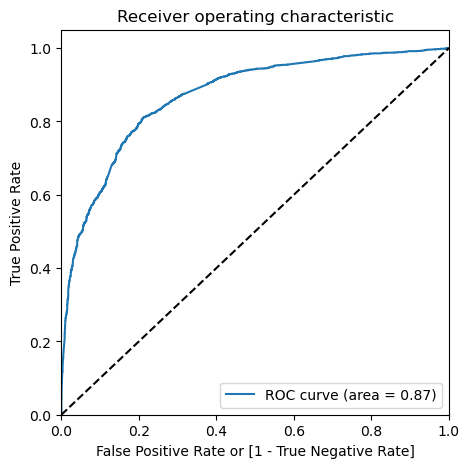

In [116]:
plt.figure(figsize=(10,10))
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.show();

### The ROC Curve should be a value close to 1. We are getting a good value of 0.87 indicating a good predictive model.

# Finding Optimal CutOff Point

In [117]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.382708,8582,0,1,1,1,1,0,0,0,0,0,0
1,1,0.944266,4387,1,1,1,1,1,1,1,1,1,1,1
2,1,0.599458,7577,1,1,1,1,1,1,1,0,0,0,0
3,0,0.636099,8879,1,1,1,1,1,1,1,1,0,0,0
4,1,0.155933,9004,0,1,1,0,0,0,0,0,0,0,0


In [118]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.484492  1.000000  0.000000
0.1   0.1  0.577541  0.985514  0.194115
0.2   0.2  0.722210  0.939720  0.517787
0.3   0.3  0.755490  0.907009  0.613087
0.4   0.4  0.794883  0.816355  0.774704
0.5   0.5  0.792846  0.748598  0.834431
0.6   0.6  0.767942  0.647196  0.881423
0.7   0.7  0.751415  0.572430  0.919631
0.8   0.8  0.727190  0.483178  0.956522
0.9   0.9  0.659497  0.314486  0.983751


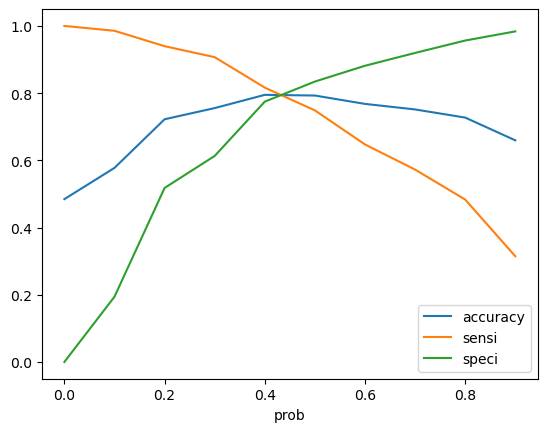

In [119]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [120]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.382708,8582,0,1,1,1,1,0,0,0,0,0,0,1
1,1,0.944266,4387,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.599458,7577,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.636099,8879,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.155933,9004,0,1,1,0,0,0,0,0,0,0,0,0


In [121]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()


,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.382708,8582,1,38
1,1,0.944266,4387,1,94
2,1,0.599458,7577,1,60
3,0,0.636099,8879,1,64
4,1,0.155933,9004,0,16


In [122]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7554901516866651

In [123]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[1396,  881],
       [ 199, 1941]], dtype=int64)

In [124]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [125]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9070093457943925

In [126]:
# Let us calculate specificity
TN / float(TN+FP)

0.6130873956960914

### Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.87, which is very good. We have the following values for the Train Data:

    * Accuracy    : 79.99%
    * Sensitivity : 74.86%
    * Specificity : 83.44%
    
Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recal

In [127]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.38691260430390867


In [128]:
# Positive predictive value 
print (TP / float(TP+FP))

0.68781006378455


In [129]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8752351097178683


In [130]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[1396,  881],
       [ 199, 1941]], dtype=int64)

In [131]:
##### Precision
TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])


0.68781006378455

In [132]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9070093457943925

In [133]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.68781006378455

In [134]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9070093457943925

In [135]:
from sklearn.metrics import precision_recall_curve

In [136]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


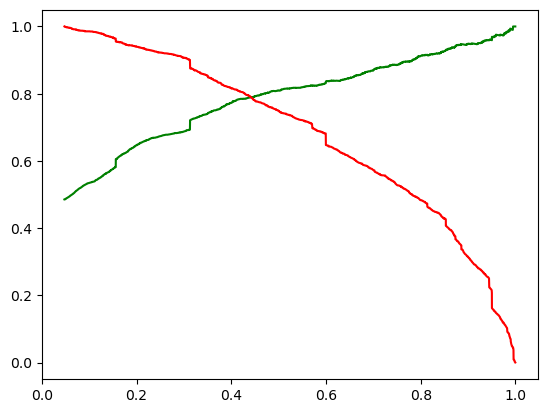

In [137]:

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()



In [138]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
472,-0.256668,0.572821,1.242863,1.427078,1.457313,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9132,-0.256668,4.653158,-0.728708,0.250553,-0.686194,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7689,-0.256668,-0.447264,-0.620629,-0.199454,1.457313,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4239,-0.256668,2.272961,1.886107,0.521642,1.457313,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7592,-0.256668,-0.107235,1.811149,0.342723,-0.686194,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [139]:
X_test = X_test[rfe_support_col]
X_test.head()



,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_SMS Sent,What is your current occupation_Working Professional,City_Select,Last Notable Activity_Modified,Last Notable Activity_Unreachable
472,1.242863,1,0,0,0,1,0,0,0
9132,-0.728708,1,0,0,0,0,0,0,0
7689,-0.620629,1,0,0,1,0,0,0,0
4239,1.886107,1,0,0,0,0,0,0,0
7592,1.811149,1,0,0,0,0,0,1,0


In [140]:
X_test_sm = sm.add_constant(X_test)

### Predictions on Test Data Set

In [141]:
y_test_pred = res.predict(X_test_sm)

In [142]:
y_test_pred[:10]

472     0.948110
9132    0.136804
7689    0.370531
4239    0.747618
7592    0.525258
8085    0.886082
3902    0.165535
7870    0.165535
8628    0.308919
4020    0.234989
dtype: float64

In [143]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [144]:
y_pred_1.head()

,0
472,0.948110
9132,0.136804
7689,0.370531
4239,0.747618
7592,0.525258


In [145]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [146]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [147]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [148]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)


In [149]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,472,0.948110
1,0,9132,0.136804
2,1,7689,0.370531
3,1,4239,0.747618
4,0,7592,0.525258


In [150]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [151]:
y_pred_final.head()


,Converted,Prospect ID,Converted_prob
0,1,472,0.948110
1,0,9132,0.136804
2,1,7689,0.370531
3,1,4239,0.747618
4,0,7592,0.525258


In [152]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]

In [153]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [154]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,472,1,0.948110,95
1,9132,0,0.136804,14
2,7689,1,0.370531,37
3,4239,1,0.747618,75
4,7592,0,0.525258,53


In [155]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [156]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,472,1,0.948110,95,1
1,9132,0,0.136804,14,0
2,7689,1,0.370531,37,1
3,4239,1,0.747618,75,1
4,7592,0,0.525258,53,1


In [157]:

# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)


0.7369255150554676

In [158]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[596, 403],
       [ 95, 799]], dtype=int64)

In [159]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [160]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8937360178970917

In [161]:
# Let us calculate specificity
TN / float(TN+FP)

0.5965965965965966

In [162]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6647254575707154

In [163]:

recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8937360178970917

### Observation:¶
**After running the model on the Test Data these are the figures we obtain:

       - Accuracy    : 79.78%
       - Sensitivity : 74.98%
       - Specificity : 83.26%
 **ROC : 0.87
       
### Final Observation:
       Let us compare the values obtained for Train & Test:

 **Train Data: 
       - Accuracy    : 75.54%
       - Sensitivity : 90.70%
       - Specificity : 61.66%
       - Recall      : 90.70%
       
 **Test Data: 
       - Accuracy    : 73.78%
       - Sensitivity : 89.98%
       - Specificity : 66.26%
       - Recall      : 89.37%
       
The Model seems to predict the Conversion Rate  well 